In [15]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/train'
test_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/test'
val_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/valid'

In [17]:
augmented_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
general_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_generator = general_datagen.flow_from_directory(
    train_data,
    target_size = (224, 224),
    batch_size = 32
)
val_generator = general_datagen.flow_from_directory(
    val_data,
    target_size = (224, 224),
    batch_size = 32
)
test_generator = general_datagen.flow_from_directory(
    test_data,
    target_size = (224, 224),
    batch_size = 32
)

Found 1927 images belonging to 12 classes.
Found 60 images belonging to 12 classes.
Found 60 images belonging to 12 classes.


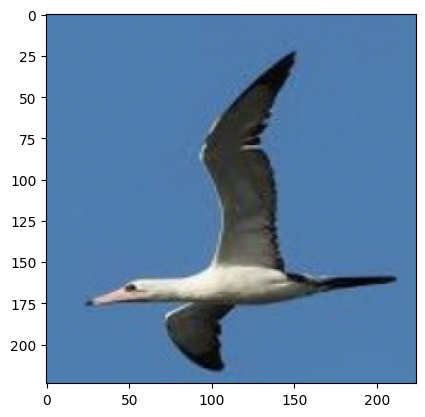

In [24]:
def plot_image(generator):
    images_in_batch = next(generator) # images_in_batch will output (batch_size, height, width, n_channels)
    img = images_in_batch[0][0] # img will output (height, width, n_chennels)
    
    plt.imshow(img)

plot_image(train_generator)

In [9]:
train_groups = len(train_generator) 
val_groups = len(val_generator) # validation_step

print(f"Train groups: {train_groups}")
print(f"Validation groups: {val_groups}")

Train groups: 61
Validation groups: 2


In [10]:
model_path = "/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/EfficientNetB0-525-(224 X 224)- 98.97.h5"
model= keras.models.load_model(model_path, custom_objects={'F1_score':'F1_score'})

In [13]:
model.compile(optimizer =keras.optimizers.legacy.Adam(learning_rate = 0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [14]:
model.fit(
    train_generator,
    steps_per_epoch=train_groups,
    epochs= 10,
    validation_data=val_generator,
    validation_steps=val_groups,
    verbose=1)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/Users/sean/.pyenv/versions/3.10.0/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/Users/sean/.pyenv/versions/3.10.0/lib/python3.10/runpy.py", line 86, in _run_code

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/sean/.pyenv/versions/3.10.0/lib/python3.10/asyncio/base_events.py", line 595, in run_forever

  File "/Users/sean/.pyenv/versions/3.10.0/lib/python3.10/asyncio/base_events.py", line 1881, in _run_once

  File "/Users/sean/.pyenv/versions/3.10.0/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/q0/rm2w_k594fx0w2480vcbn59w0000gn/T/ipykernel_2291/1177780621.py", line 1, in <module>

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/Users/sean/Documents/University_of_denver/machine_learning/ML_Class/lib/python3.10/site-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,525] labels_size=[32,12]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_25520]